In [1]:
# Import packages
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
import pickle
import os
import time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef


import ex_fuzzy.fuzzy_sets as fs
import ex_fuzzy.evolutionary_fit as GA
import ex_fuzzy.utils as  utils
import ex_fuzzy.eval_tools as eval_tools
import ex_fuzzy.persistence as persistence
import ex_fuzzy.vis_rules as vis_rules
import ex_fuzzy.classifiers as classifiers

#### Data Exploration

Text(0.5, 1.0, 'Mean Activation of each Deep Feature')

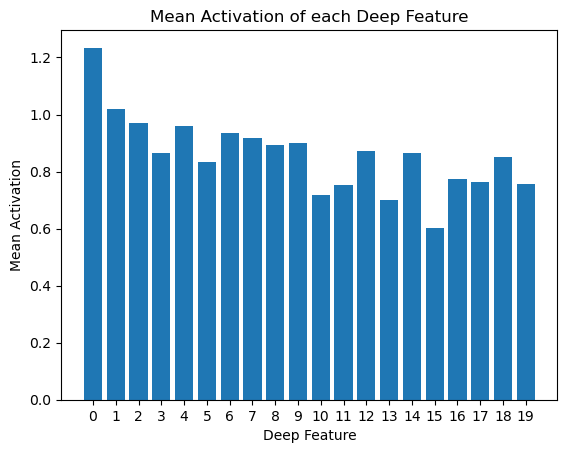

In [2]:
deep_features = pd.read_csv(r'.\\Data\\deep_features.csv', index_col=0)
means = deep_features.mean(axis=0)
plt.bar(range(20), means); plt.xticks(range(20));
plt.xlabel("Deep Feature") 
plt.ylabel("Mean Activation")
plt.title("Mean Activation of each Deep Feature")

In [3]:
dominant_features = deep_features.values.argmax(axis=1)
feature_numbers =  np.array(deep_features.columns)
deep_features["dominant_feature"] = [feature_numbers[i] for i in dominant_features]

In [4]:
deep_features

,1064,617,564,624,2018,945,388,1501,1106,1189,...,279,666,1302,667,1185,1462,1886,758,942,dominant_feature
image,,,,,,,,,,,,,,,,,,,,,
00000-allegory.jpg,1.611460,1.282985,1.324714,0.542222,0.706765,1.268130,0.315412,2.503468,1.379407,0.322881,...,1.392531,0.885033,0.485514,0.222863,0.982856,0.366072,1.215412,1.085157,0.140098,1501
00002-j_couple.jpg,0.809120,1.342070,0.760372,1.489934,0.792368,0.893135,1.435088,1.558626,1.312958,0.312761,...,1.086718,0.627048,1.121855,1.001378,0.578688,1.300461,1.238085,1.201420,0.584948,1501
00003-rudolf2.jpg,1.093800,0.461348,1.046283,0.376142,1.329826,1.083261,1.021220,1.256559,1.054622,0.271907,...,1.062788,1.485189,0.724124,1.255634,0.420330,0.578633,0.797441,0.984092,0.085477,666
00004-selfport.jpg,1.438789,1.205789,1.062270,0.076016,2.695276,0.903129,1.672469,1.151040,3.308040,0.384790,...,1.272130,0.703636,0.423299,1.319442,0.879134,2.129411,2.116234,1.032283,0.246957,1106
00005-deerlake.jpg,3.761074,1.317931,2.822557,0.156005,1.067042,0.090015,2.445269,3.515824,0.872346,1.162925,...,1.061467,0.432336,0.049647,0.198289,0.014202,0.805407,0.809965,0.415413,0.457639,1064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44793-veronica.jpg,1.102740,0.731768,0.468404,1.582682,0.841202,1.836918,0.843906,0.253868,1.384949,0.860721,...,0.313181,0.421979,0.436047,1.193191,0.642040,0.331223,1.063850,0.024771,0.894126,945
44794-virgin.jpg,1.133653,1.250061,1.641921,0.656860,0.914606,0.821970,1.014393,1.152708,0.863009,0.407846,...,0.781928,1.319099,0.393466,1.425249,0.789848,0.853211,0.471207,1.047262,0.123200,564
44795-virginas.jpg,0.524925,0.467807,0.313873,0.800593,0.828570,1.630877,1.399277,0.682684,1.416209,0.529466,...,0.976003,1.153900,0.951389,0.876614,2.323522,2.082365,1.809165,1.054617,0.918452,1185


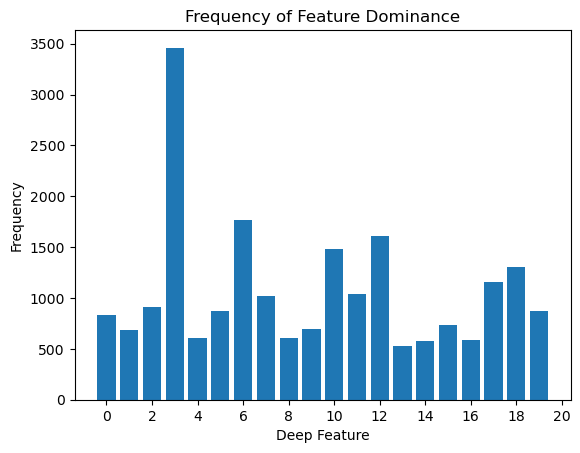

<Figure size 640x480 with 0 Axes>

In [5]:
counts = Counter(deep_features['dominant_feature'])
plt.bar(list(counts.keys()), list(counts.values()))
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.title("Frequency of Feature Dominance")
plt.xlabel("Deep Feature") 
plt.ylabel("Frequency")
plt.show()
plt.savefig(r'.\\Data\\Plots\\means.pdf')

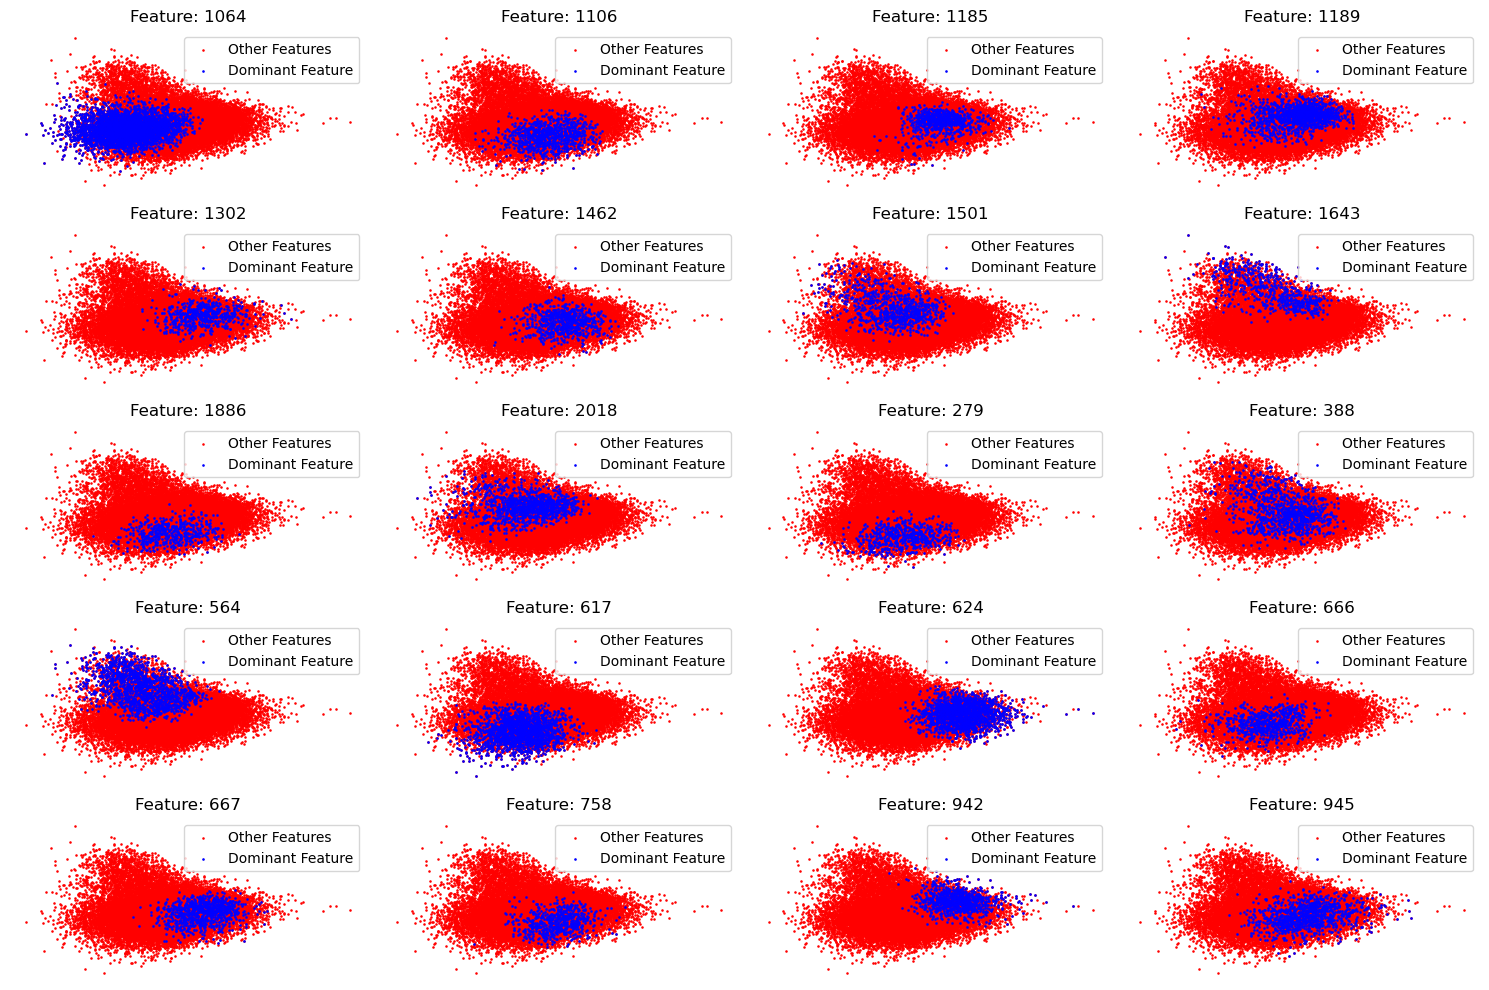

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(deep_features.drop(columns=['dominant_feature']))

def plot_PCA_dominant(feature, axis): 
    idx = deep_features['dominant_feature'] == feature
    if len(deep_features.loc[idx]) > 1:
        axis.scatter(X_pca[:, 0], X_pca[:, 1], color='red', s=0.7, label='Other Features')
        axis.scatter(X_pca[idx, 0], X_pca[idx, 1], color='blue', s=0.8, label='Dominant Feature')
        axis.set_title(f'Feature: {feature}')
        axis.legend()

# Create a 5x4 grid of subplots
fig, ax = plt.subplots(5, 4, figsize=(15, 10))

# Plot each feature in the grid
counter = 0
dominant_features = np.unique(deep_features['dominant_feature'])
for x in range(5): 
    for y in range(4): 
        if counter < len(deep_features['dominant_feature'].unique()):
            ft = dominant_features[counter]
            plot_PCA_dominant(ft, ax[x, y])
        ax[x, y].axis('off')  
        counter += 1

plt.tight_layout()  
plt.show()

In [7]:
style_data = pd.read_csv(r'.\\Data\style_predictions.csv', index_col=0)
style_data = style_data[style_data.index.isin(deep_features.index)]
deep_features = deep_features[deep_features.index.isin(style_data.index)]
style_data = pd.merge(style_data, deep_features[['dominant_feature']], left_on=style_data.index, right_on=deep_features.index, how='left')
style_data = style_data.set_index('key_0')
style_data

,Abstract_Expressionism,Action_painting,Analytical_Cubism,Art_Nouveau,Baroque,Color_Field_Painting,Contemporary_Realism,Cubism,Early_Renaissance,Expressionism,...,Pointillism,Pop_Art,Post_Impressionism,Realism,Rococo,Romanticism,Symbolism,Synthetic_Cubism,Ukiyo_e,dominant_feature
key_0,,,,,,,,,,,,,,,,,,,,,
00803-predel2.jpg,-5.855052,-2.445264,4.569021,-3.352057,5.504667,-4.261706,-3.373453,2.724554,11.630469,0.091760,...,-0.247803,-3.056488,-3.320292,-5.757197,-0.441127,-3.617446,0.297716,-0.216189,0.802261,1189
00612-01assump.jpg,-7.036362,-1.541759,1.251932,0.891822,4.758474,-4.825901,-1.799933,-1.886111,8.589615,-0.715831,...,0.132770,-2.682440,0.290388,-4.065725,-0.436026,3.389025,1.217571,-1.016447,1.816147,1185
28746-peasant.jpg,-0.700046,-1.472309,-0.545117,-1.318472,9.125407,-4.149126,0.640162,-0.042066,-2.182846,4.366738,...,-1.427454,-0.489499,-3.205423,5.222207,2.195539,-1.380008,-0.770149,-0.559620,0.070471,279
15937-nude.jpg,6.848784,3.081389,-1.157369,4.409545,-4.106697,1.904504,0.077659,-2.560646,-1.097748,-1.226942,...,4.960007,1.868661,-1.260525,-3.829489,-2.618714,-1.757044,7.611616,-0.971115,-1.122009,945
39067-5tasso21.jpg,-6.122620,-2.033544,-0.916582,4.969154,1.594321,-3.764644,-0.794799,-1.057732,5.888536,-4.822448,...,-0.887301,-3.565545,-2.281056,-3.081818,3.813381,3.989535,6.825279,-2.700673,-2.256572,1064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31741-04figure.jpg,-4.368561,-1.604356,-2.201152,-0.728140,-3.382214,-3.291329,0.514204,-1.110920,-1.991090,5.597282,...,0.760221,-2.274839,5.534639,5.554814,-2.139296,4.075707,-1.731012,-3.219984,-3.541601,564
39842-0chieri2.jpg,-4.172577,-2.962160,-1.814896,7.168221,-1.861353,-6.101577,-0.160826,-1.702740,4.452664,0.895348,...,0.750545,-3.533200,-2.972524,0.469076,1.206839,14.448431,4.543254,-1.894256,-0.608149,624
37058-4damned1.jpg,-8.391786,-2.856728,1.239791,-1.644404,4.711830,-5.358346,-3.686624,1.218440,6.905844,-1.158797,...,-3.021946,0.055602,-2.470524,-5.984673,2.592009,-0.929645,2.715388,-3.423955,-2.583489,1189


In [8]:
#Sanity
print(Counter(style_data['dominant_feature']))

Counter({'1064': 3073, '617': 1606, '624': 1450, '564': 1339, '1189': 1196, '2018': 1060, '388': 941, '945': 903, '1106': 821, '667': 780, '942': 773, '1501': 743, '1185': 661, '1462': 639, '666': 617, '1643': 547, '758': 545, '279': 527, '1302': 525, '1886': 473})


#### Gradient Boosting Classifier setup

In [9]:
def load_data(style_data, sample_ratio=0.1):

    data = style_data.sample(frac=sample_ratio, random_state=33) 
    data.fillna(0, inplace=True)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return X, y

In [10]:
X, y = load_data(style_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33, stratify=y)

# Print the shape of the training and test sets
print('Shape of the training set: ' + str(X_train.shape))
print('Shape of the test set: ' + str(X_test.shape))

Shape of the training set: (1537, 27)
Shape of the test set: (385, 27)


In [11]:
%%time
if os.path.isfile(".//Data//Model//GBC Deep Features//gbc_all.pkl"):
    classifier = pickle.load(open(".//Data//Model//GBC Deep Features//gbc_all.pkl", 'rb'))
else: 
    classifier = GradientBoostingClassifier(learning_rate=0.1, random_state=0)
    classifier.fit(X_train, y_train)
    
    file_name = 'gbc_all.pkl'
    with open(file_name, 'wb') as f:
        pickle.dump(classifier, f)
            
y_pred = classifier.predict(X_test)
print('Accuracy of the classifier: ', accuracy_score(y_test, y_pred))

Accuracy of the classifier:  0.2077922077922078
CPU times: total: 31.2 ms
Wall time: 70 ms


#### GBC using one-vs-all scheme

In [12]:
%%time 

smote = SMOTE(random_state=42)
mccs = []
feature_importances = []

for i in dominant_features: 
    y_tmp = np.array(y_train==i).astype(int)
    y_test_tmp  = np.array(y_test==i).astype(int)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_tmp)
    file_name = ".//Data//Model//GBC Deep Features//gbc" +str(i) +".pkl"
    if os.path.isfile(file_name):
        classifier = pickle.load(open(file_name, 'rb'))
    else: 
        classifier = GradientBoostingClassifier(learning_rate=0.1, random_state=0)
        classifier.fit(X_resampled, y_resampled)
        file_name = f'.//Data//Model//GBC Deep Features//gbc{i}.pkl'
        with open(file_name, 'wb') as f:
            pickle.dump(classifier, f)
    feature_importances.append(classifier.feature_importances_)
    y_pred = classifier.predict(X_test)
    mcc = matthews_corrcoef(y_test_tmp, y_pred)
    print(f'MCC of the classifier (Feature={i}): ', mcc)
    mccs.append(mcc)

MCC of the classifier (Feature=1064):  0.4564376386022971
MCC of the classifier (Feature=1106):  0.21671563383076467
MCC of the classifier (Feature=1185):  0.2300789234172203
MCC of the classifier (Feature=1189):  0.19789307586761692
MCC of the classifier (Feature=1302):  0.17923593605527768
MCC of the classifier (Feature=1462):  0.13236517060001743
MCC of the classifier (Feature=1501):  0.2227443995107596
MCC of the classifier (Feature=1643):  0.37559821660825726
MCC of the classifier (Feature=1886):  0.18867124408214234
MCC of the classifier (Feature=2018):  0.3323078956508118
MCC of the classifier (Feature=279):  0.305790079200658
MCC of the classifier (Feature=388):  0.31269580122758417
MCC of the classifier (Feature=564):  0.4446800416467545
MCC of the classifier (Feature=617):  0.2921358616293003
MCC of the classifier (Feature=624):  0.27593384409332755
MCC of the classifier (Feature=666):  0.18212629247244425
MCC of the classifier (Feature=667):  0.22324224182660588
MCC of the c

#### Calculate feature importances

In [13]:
feature_importances = np.array(feature_importances)
mean_importances = np.mean(feature_importances, axis=0)
mean_importances

array([0.01890007, 0.03332765, 0.02717222, 0.0215269 , 0.10728488,
       0.03404044, 0.02269294, 0.01618376, 0.12009847, 0.02423647,
       0.03833819, 0.0379661 , 0.03261922, 0.04205257, 0.023118  ,
       0.02125893, 0.03525432, 0.035558  , 0.02750079, 0.0429408 ,
       0.02896851, 0.02190312, 0.08200392, 0.02269291, 0.01617558,
       0.03984931, 0.02633593])

Text(0.5, 1.0, 'Mean Importance of each Style Characteristic')

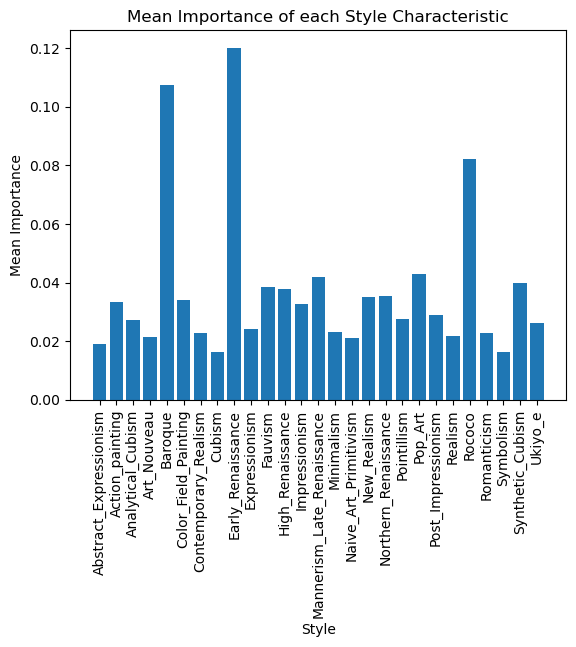

In [14]:
plt.bar(style_data.columns[:-1], mean_importances)
plt.xticks(rotation='vertical');
plt.xlabel("Style")
plt.ylabel("Mean Importance")
plt.title("Mean Importance of each Style Characteristic")

In [15]:
#importance_threshold = np.mean(mean_importances)
importance_threshold = 0.03
X_new = X.iloc[:, mean_importances >= importance_threshold]
X_train_new = X_train.iloc[:, mean_importances >= importance_threshold]
X_test_new = X_test.iloc[:, mean_importances >= importance_threshold]
important_features = list(X_new.columns)
print("Most Important Features: ", important_features)

Most Important Features:  ['Action_painting', 'Baroque', 'Color_Field_Painting', 'Early_Renaissance', 'Fauvism', 'High_Renaissance', 'Impressionism', 'Mannerism_Late_Renaissance', 'New_Realism', 'Northern_Renaissance', 'Pop_Art', 'Rococo', 'Synthetic_Cubism']


#### Re-run GBC using most important features

In [16]:
%%time
classifier = GradientBoostingClassifier(learning_rate=0.1, random_state=0)
classifier.fit(X_train_new, y_train)
y_pred = classifier.predict(X_test_new)
print('Accuracy of the classifier with reduced dimensions: ', accuracy_score(y_test, y_pred))
print('Matthews correlation coefficient: ', matthews_corrcoef(y_test, y_pred))

Accuracy of the classifier with reduced dimensions:  0.2077922077922078
Matthews correlation coefficient:  0.13321116060095647
CPU times: total: 9.69 s
Wall time: 15.7 s


#### Setup for FRBC

Experiment is adapted from code: https://github.com/Fuminides/context-art-classification/blob/master/Infus_experiments_rules_data/gogh_gauguin.py

In [17]:
# Default params
threads = 1 # 1: single thread, 2+: corresponding multi-thread
n_gen = 100
n_pop = 50
nRules = 8
nAnts = 3
vl = 3
tolerance = 0.1
fz_type_studied = fs.FUZZY_SETS.t1

def generate_rules(X, X_train, y_train, X_test, y_test):
    fz_type_studied = fs.FUZZY_SETS.t1

    precomputed_partitions = utils.construct_partitions(X, fz_type_studied)
    min_bounds = np.min(X, axis=0).values
    max_bounds = np.max(X, axis=0).values
    domain = [min_bounds, max_bounds]

    print('Training fuzzy classifier:' , nRules, 'rules, ', nAnts, 'ants, ', n_gen, 'generations, ', n_pop, 'population size')
    fl_classifier = classifiers.FuzzyRulesClassifier(nRules=nRules, nAnts=nAnts, fuzzy_type=fz_type_studied, linguistic_variables=precomputed_partitions, verbose=False, tolerance=tolerance, runner=threads)
    fl_classifier.fit(X_train, y_train, n_gen=n_gen, pop_size=n_pop)

    str_rules = eval_tools.eval_fuzzy_model(fl_classifier.internal_classifier(), X_train, y_train, X_test, y_test,
                        plot_rules=False, print_rules=True, plot_partitions=False, return_rules=True)

#### Run experiment to generate rules for each deep feature

In [18]:
for i in dominant_features: 
    start = time.time()
    print("************************")
    print(f"Feature {i}")
    y_tmp = np.array(y_train==i).astype(int)
    y_test_tmp  = np.array(y_test==i).astype(int)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_tmp)
    X_resampled = X_resampled.loc[:, important_features]
    X_test = X_test.loc[:, important_features]
    generate_rules(X_new, X_resampled, y_resampled, X_test, y_test_tmp)
    end = time.time()
    print(f'Duration = {end-start}')

************************
Feature 1064
Training fuzzy classifier: 8 rules,  3 ants,  100 generations,  50 population size
------------
ACCURACY
Train performance: 0.6783513097072419
Test performance: 0.6597402597402597
------------
MATTHEW CORRCOEF
Train performance: 0.35901236415348176
Test performance: 0.27005947687616133
------------
Rules for consequent: 0
----------------
IF Action_painting IS High AND New_Realism IS Low WITH DS 0.12978113541669675, ACC 0.5040650406504065
IF Rococo IS Low WITH DS 0.36119353243646174, ACC 0.8515625

Rules for consequent: 1
----------------
IF Synthetic_Cubism IS Low WITH DS 0.37717290015016647, ACC 0.6602076124567474


Duration = 82.3166275024414
************************
Feature 1106
Training fuzzy classifier: 8 rules,  3 ants,  100 generations,  50 population size
------------
ACCURACY
Train performance: 0.7173766058147397
Test performance: 0.7350649350649351
------------
MATTHEW CORRCOEF
Train performance: 0.43937691084930314
Test performance: 0.0